In [70]:
#Advanced Housing Prices Analysis
#Source - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
#Source - https://www.youtube.com/watch?v=vtm35gVP8JU&t=37s

#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

import pandas as pd
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import seaborn as sns

pd.options.display.max_rows = 4000



train_data = '/Users/1flo/Downloads/Machine-learning/2022Practice/house-prices-advanced-regression-techniques/train.csv'
train_df = pd.read_csv(train_data)
train_dfh = train_df.head()

test_data = '/Users/1flo/Downloads/Machine-learning/2022Practice/house-prices-advanced-regression-techniques/test.csv'
test_df = pd.read_csv(test_data)
test_dfh = test_df.head()

train_dfh
#print(dfh)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [71]:
#Check the missing values
train_df.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [72]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

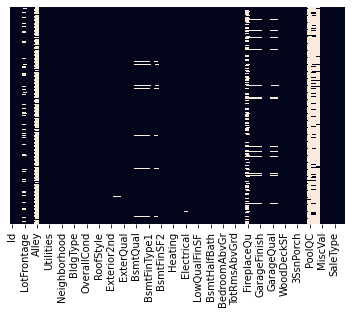

In [73]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar= False)

In [74]:
train_df.shape

(1460, 81)

In [75]:
#Each Feature here needs to be handled appropriately. If >60% missing values, then ignore
#If few missing values, replace missing with average of the available values
#If the feature is type object and not values, replace with the Mode (most commonly found)

# LotFrontage has ~250 & 220 missing in train & test. Therefore replace missing with average
# fillna -> Replace NULL values with whatever, in this case mean
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
#Next Feature to target -> MSZoning as In test data, MSZoning has 4 NULL values
#Type for MSZoning is object, therefore take mode
train_df['MSZoning'].value_counts()

test_df['MSZoning']=test_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0])


#test_df.isnull().sum()

In [78]:
#Next feature to target -> Alleys >80% missing values
train_df.drop(['Alley'], axis=1, inplace=True)

In [79]:
train_df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [80]:
#Similarly observe the dataset and perform operations on remaining missing data
#This can be done with a loop in the future
#Likely drop done for GarageYrBlt since taking average of year doesn't make sense
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df.drop(['GarageYrBlt','PoolQC','Fence','MiscFeature','Id'], axis=1, inplace=True)

In [81]:
train_df.shape

(1460, 75)

In [82]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

<AxesSubplot:>

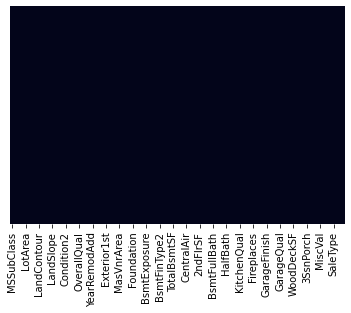

In [87]:
#Handle remaining NULL Values
train_df['MasVnrType']=train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0])

train_df.isnull().sum()

sns.heatmap(train_df.isnull(), yticklabels=False, cbar= False)

In [89]:
train_df['BsmtCond'].value_counts()



TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [90]:
test_df['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [91]:
#As seen above category 'Gd' of BsmtCond is only seen in test data and not in training data. Hence handle both together

temp=train_df.select_dtypes(include=['object'])

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
49         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
50         RL   Pave      IR2         Lvl    AllPub    Corner       Gtl   
51         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
52         RM   Grvl      IR2 

In [93]:
list(train_df.select_dtypes(include=['object']).columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [94]:
len(list(train_df.select_dtypes(include=['object']).columns))

39